## Задача Beltel для предсказывания продаж в 2024 году.

### Постановка задачи

$Построить\;модель\;прогнозирования\;продаж,\;которая\;учитывает\;день\;недели\;и\;акцию.$<br>
$Прогноз\;должен\;быть\;построен\;на\;январь\;2024\;года\;по\;всем\;товарам, \;которые\;участвовали\;в\;продажах\;в\;декабре\;2023.\;Разделитель\;в\;файле    \;';'.$<br>

### Предварительный анализ данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df1 = pd.read_csv(r'C:\Users\fff02\Downloads\test-main\test-main\discounts_raw.csv')
df2 = pd.read_csv(r'C:\Users\fff02\Downloads\test-main\test-main\sales_raw.csv')

In [4]:
print('discounts_raw shape', df1.shape)
df1.head()

discounts_raw shape (2081, 6)


,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,100551,5.0,159.9,139.9,2023-03-02,2023-03-15
1,100553,5.0,159.9,139.9,2023-03-02,2023-03-15
2,100554,5.0,159.9,139.9,2023-03-02,2023-03-15
3,100558,5.0,159.9,139.9,2023-03-02,2023-03-15
4,100530,2.0,36.9,24.6,2021-09-09,2021-09-22


In [5]:
print('sales_raw shape', df2.shape)
df2.head()

sales_raw shape (147143, 3)


,date,item_id,qnty
0,2017-01-01,100001,7.0
1,2017-01-01,100003,2.0
2,2017-01-01,100006,13.0
3,2017-01-01,100010,5.0
4,2017-01-01,100035,53.0


In [6]:
df1.dtypes

item_id                      int64
promo_typeCode             float64
sale_price_before_promo    float64
sale_price_time_promo      float64
date_start                  object
date_end                    object
dtype: object

In [7]:
df2.dtypes

date        object
item_id      int64
qnty       float64
dtype: object

In [8]:
df1.describe()

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo
count,2081.000000,2041.000000,2081.000000,2081.000000
mean,100475.755887,6.667810,154.801394,111.052134
std,151.486922,5.424833,137.022563,107.924850
min,100045.000000,1.000000,35.800000,23.870000
25%,100375.000000,5.000000,77.900000,59.900000
50%,100523.000000,6.000000,114.900000,84.900000
75%,100601.000000,6.000000,159.900000,109.900000
max,100691.000000,44.000000,759.900000,689.900000


In [9]:
df2.describe()

,item_id,qnty
count,147143.000000,147143.000000
mean,99552.401038,8.778191
std,8819.498659,27.696091
min,11200.000000,-3.000000
25%,100257.000000,1.000000
50%,100486.000000,3.000000
75%,100601.000000,7.000000
max,100691.000000,1201.000000


In [10]:
df1.nunique()

item_id                     84
promo_typeCode              10
sale_price_before_promo    135
sale_price_time_promo      108
date_start                 264
date_end                   241
dtype: int64

In [11]:
df2.nunique()

date       2556
item_id     100
qnty        487
dtype: int64

$Из\;предварительного\;анализа\;данных\;ясно,\;что\;датасет\;содержит\;в\;себе\;данные\;object\;типа.\;$<br>
$Date\_start,\;date\_end\;и\;date\;нужно\;преобразовать\;в\;формат\;даты.$<br>

### Исследовательский анализ данных

In [12]:
df1['date_start'] = pd.to_datetime(df1['date_start'])
df1['date_end'] = pd.to_datetime(df1['date_end'])
df2['date']=pd.to_datetime(df2['date'])

In [13]:
daily_sales  = df2.resample('D', on='date')['qnty'].sum()
print(daily_sales)

date
2017-01-01    289.0
2017-01-02    278.0
2017-01-03    356.0
2017-01-04    386.0
2017-01-05    424.0
              ...  
2023-12-27    810.0
2023-12-28    926.0
2023-12-29    718.0
2023-12-30    914.0
2023-12-31    782.0
Freq: D, Name: qnty, Length: 2556, dtype: float64


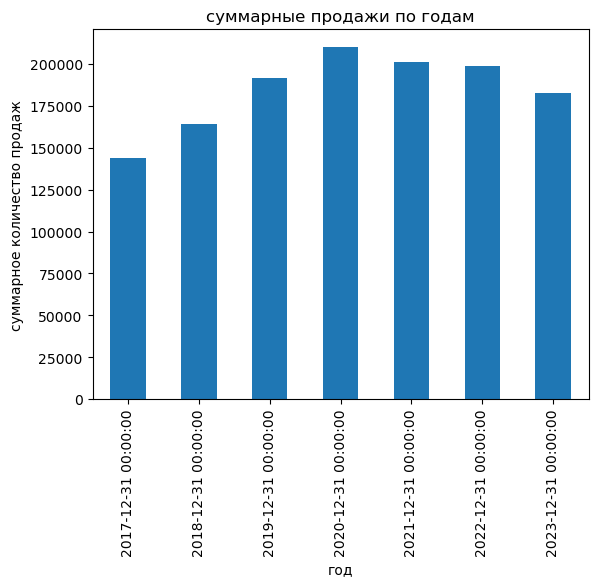

In [14]:
yearly_sales = df2.resample('Y', on='date')['qnty'].sum()
yearly_sales.head()
yearly_sales.plot(kind='bar')
plt.title('суммарные продажи по годам')
plt.xlabel('год')
plt.ylabel('суммарное количество продаж')
plt.show()

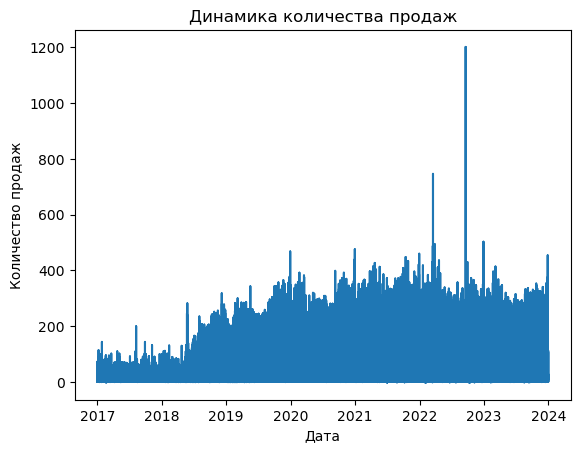

In [15]:
plt.plot(df2['date'], df2['qnty'])
plt.title('Динамика количества продаж')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

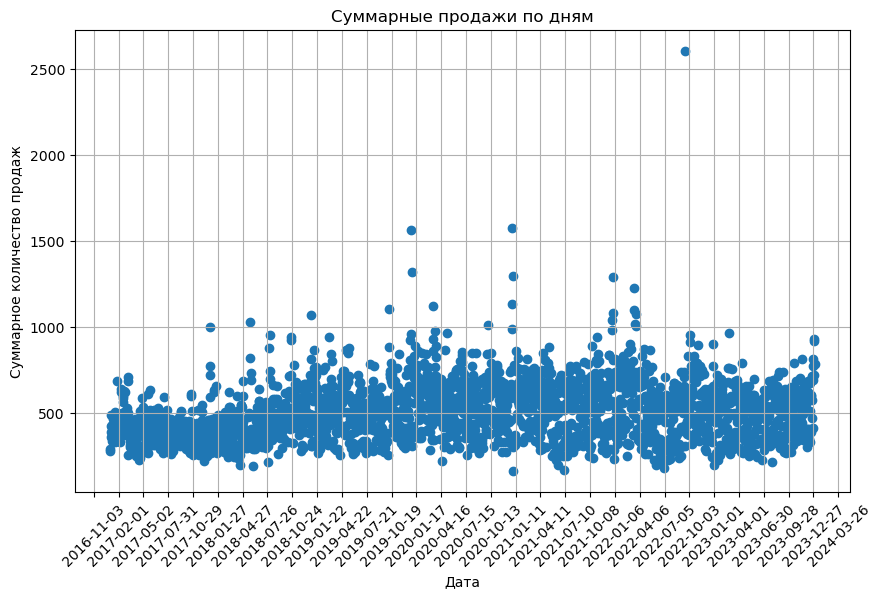

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

daily_sales = df2.groupby(df2['date']).agg({'qnty':'sum'}).reset_index()

# Построение scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_sales['date'], daily_sales['qnty'])

plt.title('Суммарные продажи по дням')
plt.xlabel('Дата')
plt.ylabel('Суммарное количество продаж')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=90))  # Каждые 30 дней для удобства чтения
plt.xticks(rotation=45)

plt.show()


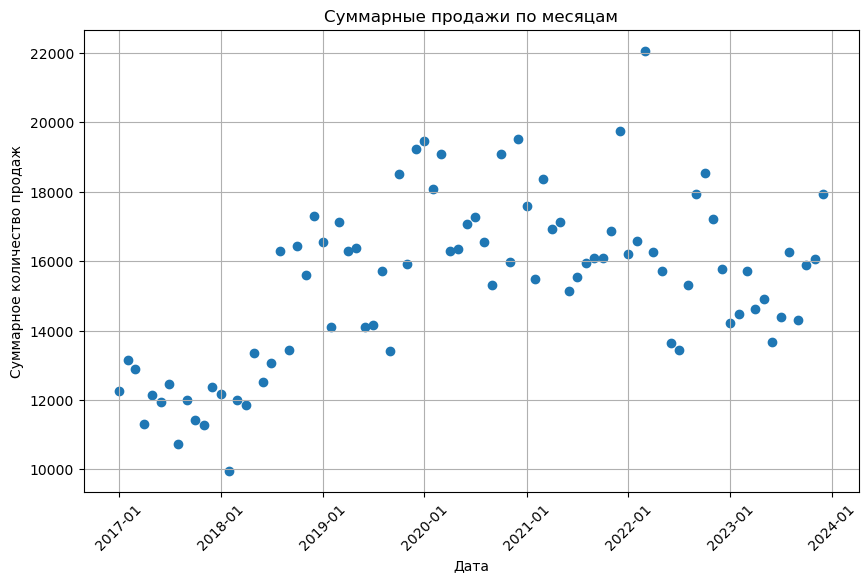

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

monthly_sales = df2.groupby(df2['date'].dt.to_period('M')).agg({'qnty': 'sum'}).reset_index()

monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.scatter(monthly_sales['date'], monthly_sales['qnty'])

plt.title('Суммарные продажи по месяцам')
plt.xlabel('Дата')
plt.ylabel('Суммарное количество продаж')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m')) 
plt.xticks(rotation=45)

plt.show()


$C\;учетом\;поставленной\;задачи,\;изучим\boldsymbol\;\boldsymbol п\boldsymbol р\boldsymbol о\boldsymbol д\boldsymbol а\boldsymbol ж\boldsymbol и\boldsymbol\;\boldsymbol з\boldsymbol а\boldsymbol\;\mathbf{2023}\boldsymbol\;\boldsymbol г\boldsymbol о\boldsymbol д$<br>

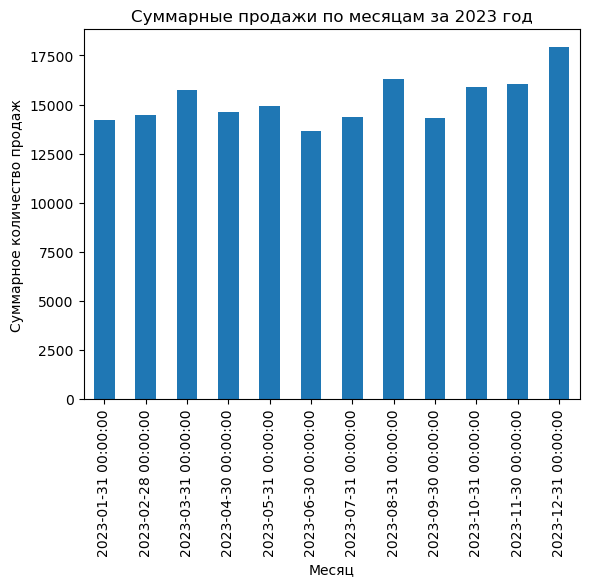

In [18]:
specific_year_sales = df2[(df2['date'] >= '2023-01-01') & (df2['date']<='2023-12-31')]
specific_year_sales = specific_year_sales.resample('M', on='date')['qnty'].sum()
specific_year_sales.head()
specific_year_sales.plot(kind='bar')
plt.title('Суммарные продажи по месяцам за 2023 год')
plt.xlabel('Месяц')
plt.ylabel('Суммарное количество продаж')
plt.show()

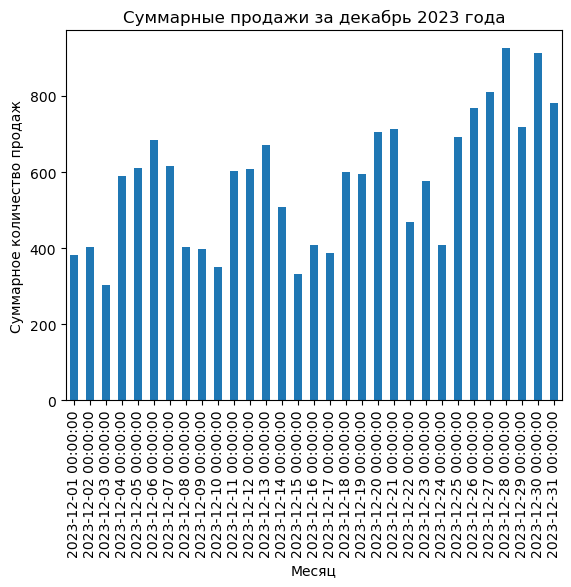

In [19]:
specific_month_sales = df2[(df2['date'] >= '2023-12-01') & (df2['date']<='2023-12-31')]
specific_month_sales = specific_month_sales .resample('D', on='date')['qnty'].sum()
specific_month_sales.head()
specific_month_sales.plot(kind='bar')
plt.title('Суммарные продажи за декабрь 2023 года')
plt.xlabel('Месяц')
plt.ylabel('Суммарное количество продаж')
plt.show()

$Из\;представленных\;графиков\;можно\;заметить,что\;продажи\;росли\;с\;2017\;по\;2022.$<br>
$С\;2022\;по\;начало\;2023\;наблюдался\;спад.$<br>
$Если\;обратиться\;к\;гистограммам\;2023\;года,\;то\;наибольшее\;количество\;продаж$<br>
$наблюдалось\;в\;декабре.$<br>

## Предобработка данных

In [20]:
df1_copy = df1.copy(deep=True)
df2_copy = df2.copy(deep=True)

In [21]:
duplicates = df1.duplicated()
print(duplicates.any())  
duplicates = df2.duplicated()
print(duplicates.any())  

False
False


In [22]:
df1_copy.isnull().sum()

item_id                     0
promo_typeCode             40
sale_price_before_promo     0
sale_price_time_promo       0
date_start                  0
date_end                    0
dtype: int64

In [23]:
df1.isnull().sum()

item_id                     0
promo_typeCode             40
sale_price_before_promo     0
sale_price_time_promo       0
date_start                  0
date_end                    0
dtype: int64

In [24]:
df1_copy.fillna(0,inplace=True)

In [25]:
df1_copy.isnull().sum()
df1_copy.shape

(2081, 6)

In [26]:
df1.dropna(inplace=True)

In [27]:
df1.shape

(2041, 6)

In [28]:
df2c = df2[(df2['date'] >= '2023-12-01') & (df2['date'] <= '2023-12-31')].copy(deep=True)

In [29]:
def check_discount(row):
    item_id = row['item_id']
    sale_date = row['date']
    relevant_discounts = df1[(df1['item_id'] == item_id) & 
                             (df1['date_start'] <= sale_date) &
                             (df1['date_end'] >= sale_date)]
    if relevant_discounts.empty:
        return pd.Series({'discount_applied': 0, 
                          'sale_price_before_promo': 0,
                          'sale_price_time_promo': 0,
                          'price_w_discount': 0,
                          'promo_typeCode': 0})  # Добавляем признак promo_typeCode и присваиваем значение 0
    else:
        discount_row = relevant_discounts.iloc[0] 
        price_w_discount = discount_row['sale_price_before_promo'] - discount_row['sale_price_time_promo']

        return pd.Series({'discount_applied': 1, 
                          'sale_price_before_promo': discount_row['sale_price_before_promo'],
                          'sale_price_time_promo': discount_row['sale_price_time_promo'],
                          'price_w_discount': price_w_discount,
                          'promo_typeCode': discount_row['promo_typeCode']})  # Добавляем значение promo_typeCode

# Применение функции к каждой записи о продаже
df2c[['discount_applied', 'sale_price_before_promo', 'sale_price_time_promo', 'price_w_discount', 'promo_typeCode']] = df2c.apply(check_discount, axis=1)
df2c.count()

date                       1973
item_id                    1973
qnty                       1973
discount_applied           1973
sale_price_before_promo    1973
sale_price_time_promo      1973
price_w_discount           1973
promo_typeCode             1973
dtype: int64

In [30]:
# def check_discount(row):
#     item_id = row['item_id']
#     sale_date = row['date']
#     relevant_discounts = df1[(df1['item_id'] == item_id) & 
#                              (df1['date_start'] <= sale_date) &
#                              (df1['date_end'] >= sale_date)]
#     if relevant_discounts.empty:
#         return pd.Series({'discount_applied': 0, 
#                           'sale_price_before_promo': 0,
#                           'sale_price_time_promo': 0,
                          
#                          'price_w_discount':0})
#     else:
#         discount_row = relevant_discounts.iloc[0] 
#         price_w_discount = discount_row['sale_price_before_promo'] - discount_row['sale_price_time_promo']

#         return pd.Series({'discount_applied': 1, 
#                           'sale_price_before_promo': discount_row['sale_price_before_promo'],
#                           'sale_price_time_promo': discount_row['sale_price_time_promo'],
#                          'price_w_discount':price_w_discount})

# # Применение функции к каждой записи о продаже
# df2c[['discount_applied', 'sale_price_before_promo', 'sale_price_time_promo','price_w_discount']] = df2c.apply(check_discount, axis=1)

# # Если нужно сохранить результат в новый DataFrame
# # new_df = df2c.copy()
# # new_df.head()

# # Если нужно сохранить изменения в исходный DataFrame
# # df2c.head()


In [31]:
df2c

,date,item_id,qnty,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode
145170,2023-12-01,100545,3.0,1.0,229.9,179.9,50.0,44.0
145171,2023-12-01,100645,4.0,0.0,0.0,0.0,0.0,0.0
145172,2023-12-01,100683,1.0,0.0,0.0,0.0,0.0,0.0
145173,2023-12-01,100612,10.0,0.0,0.0,0.0,0.0,0.0
145174,2023-12-01,100165,15.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
147138,2023-12-31,100614,5.0,0.0,0.0,0.0,0.0,0.0
147139,2023-12-31,100140,4.0,1.0,749.9,689.9,60.0,6.0
147140,2023-12-31,100650,11.0,1.0,109.9,79.9,30.0,5.0
147141,2023-12-31,100182,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df1

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,100551,5.0,159.9,139.9,2023-03-02,2023-03-15
1,100553,5.0,159.9,139.9,2023-03-02,2023-03-15
2,100554,5.0,159.9,139.9,2023-03-02,2023-03-15
3,100558,5.0,159.9,139.9,2023-03-02,2023-03-15
4,100530,2.0,36.9,24.6,2021-09-09,2021-09-22
...,...,...,...,...,...,...
2076,100471,10.0,71.9,49.9,2023-05-25,2023-06-07
2077,100469,5.0,69.9,44.9,2023-11-07,2023-11-22
2078,100470,5.0,69.9,44.9,2023-11-07,2023-11-19
2079,100471,5.0,69.9,44.9,2023-11-07,2023-11-19


In [33]:
df1_copy.shape

(2081, 6)

In [34]:
df1.loc[df1['item_id']==100045]

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
313,100045,6.0,599.9,499.9,2020-09-10,2020-09-28
469,100045,5.0,599.9,499.9,2020-08-20,2020-09-09
1202,100045,5.0,599.9,499.9,2020-09-29,2020-10-21
1761,100045,6.0,599.9,499.9,2020-10-22,2020-11-09


In [35]:
merged_df = pd.merge(df2_copy, df1_copy, on='item_id', how='inner')
merged_df.head(10)

,date,item_id,qnty,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,2017-01-01,100045,3.0,6.0,599.9,499.9,2020-09-10,2020-09-28
1,2017-01-01,100045,3.0,5.0,599.9,499.9,2020-08-20,2020-09-09
2,2017-01-01,100045,3.0,5.0,599.9,499.9,2020-09-29,2020-10-21
3,2017-01-01,100045,3.0,6.0,599.9,499.9,2020-10-22,2020-11-09
4,2017-01-02,100045,1.0,6.0,599.9,499.9,2020-09-10,2020-09-28
5,2017-01-02,100045,1.0,5.0,599.9,499.9,2020-08-20,2020-09-09
6,2017-01-02,100045,1.0,5.0,599.9,499.9,2020-09-29,2020-10-21
7,2017-01-02,100045,1.0,6.0,599.9,499.9,2020-10-22,2020-11-09
8,2017-01-03,100045,1.0,6.0,599.9,499.9,2020-09-10,2020-09-28
9,2017-01-03,100045,1.0,5.0,599.9,499.9,2020-08-20,2020-09-09


In [36]:
merged_df.shape

(3071617, 8)

In [37]:
merged_df.drop_duplicates(subset=['sale_price_before_promo', 'sale_price_time_promo'], inplace=True)
merged_df

,date,item_id,qnty,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,2017-01-01,100045,3.0,6.0,599.9,499.9,2020-09-10,2020-09-28
3332,2017-01-01,100192,2.0,6.0,119.9,96.9,2023-08-03,2023-08-16
3333,2017-01-01,100192,2.0,6.0,94.9,79.9,2020-02-06,2020-02-19
3334,2017-01-01,100192,2.0,6.0,94.9,69.9,2021-07-29,2021-08-11
3335,2017-01-01,100192,2.0,6.0,119.9,99.9,2023-03-16,2023-03-29
...,...,...,...,...,...,...,...,...
3028008,2020-01-19,100664,1.0,6.0,103.9,79.9,2020-06-10,2020-06-24
3029470,2020-01-22,100648,2.0,5.0,81.9,59.9,2021-10-21,2021-11-01
3029479,2020-01-22,100648,2.0,5.0,61.0,44.9,2020-02-20,2020-03-04
3029484,2020-01-22,100648,2.0,6.0,81.9,54.9,2021-06-03,2021-06-16


In [38]:
filtered_rows = merged_df[merged_df['item_id'] == 100045]
print(filtered_rows.count())


date                       1
item_id                    1
qnty                       1
promo_typeCode             1
sale_price_before_promo    1
sale_price_time_promo      1
date_start                 1
date_end                   1
dtype: int64


In [39]:
df2c

,date,item_id,qnty,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode
145170,2023-12-01,100545,3.0,1.0,229.9,179.9,50.0,44.0
145171,2023-12-01,100645,4.0,0.0,0.0,0.0,0.0,0.0
145172,2023-12-01,100683,1.0,0.0,0.0,0.0,0.0,0.0
145173,2023-12-01,100612,10.0,0.0,0.0,0.0,0.0,0.0
145174,2023-12-01,100165,15.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
147138,2023-12-31,100614,5.0,0.0,0.0,0.0,0.0,0.0
147139,2023-12-31,100140,4.0,1.0,749.9,689.9,60.0,6.0
147140,2023-12-31,100650,11.0,1.0,109.9,79.9,30.0,5.0
147141,2023-12-31,100182,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df2c.reset_index(drop=True, inplace=True)
df2c

,date,item_id,qnty,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode
0,2023-12-01,100545,3.0,1.0,229.9,179.9,50.0,44.0
1,2023-12-01,100645,4.0,0.0,0.0,0.0,0.0,0.0
2,2023-12-01,100683,1.0,0.0,0.0,0.0,0.0,0.0
3,2023-12-01,100612,10.0,0.0,0.0,0.0,0.0,0.0
4,2023-12-01,100165,15.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1968,2023-12-31,100614,5.0,0.0,0.0,0.0,0.0,0.0
1969,2023-12-31,100140,4.0,1.0,749.9,689.9,60.0,6.0
1970,2023-12-31,100650,11.0,1.0,109.9,79.9,30.0,5.0
1971,2023-12-31,100182,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df1['date_start'] = pd.to_datetime(df1['date_start'])
df1['date_end'] = pd.to_datetime(df1['date_end'])

df1

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,100551,5.0,159.9,139.9,2023-03-02,2023-03-15
1,100553,5.0,159.9,139.9,2023-03-02,2023-03-15
2,100554,5.0,159.9,139.9,2023-03-02,2023-03-15
3,100558,5.0,159.9,139.9,2023-03-02,2023-03-15
4,100530,2.0,36.9,24.6,2021-09-09,2021-09-22
...,...,...,...,...,...,...
2076,100471,10.0,71.9,49.9,2023-05-25,2023-06-07
2077,100469,5.0,69.9,44.9,2023-11-07,2023-11-22
2078,100470,5.0,69.9,44.9,2023-11-07,2023-11-19
2079,100471,5.0,69.9,44.9,2023-11-07,2023-11-19


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df2c[['day_of_week', 'discount_applied']], 
                                                    df2c['qnty'], 
                                                    test_size=0.2, 
                                                    random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


KeyError: "['day_of_week'] not in index"

In [44]:
df2c['day_of_week'] = df2c['date'].dt.dayofweek
df2c

,date,item_id,qnty,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode,day_of_week
0,2023-12-01,100545,3.0,1.0,229.9,179.9,50.0,44.0,4
1,2023-12-01,100645,4.0,0.0,0.0,0.0,0.0,0.0,4
2,2023-12-01,100683,1.0,0.0,0.0,0.0,0.0,0.0,4
3,2023-12-01,100612,10.0,0.0,0.0,0.0,0.0,0.0,4
4,2023-12-01,100165,15.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...
1968,2023-12-31,100614,5.0,0.0,0.0,0.0,0.0,0.0,6
1969,2023-12-31,100140,4.0,1.0,749.9,689.9,60.0,6.0,6
1970,2023-12-31,100650,11.0,1.0,109.9,79.9,30.0,5.0,6
1971,2023-12-31,100182,1.0,0.0,0.0,0.0,0.0,0.0,6


In [45]:
df1

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,100551,5.0,159.9,139.9,2023-03-02,2023-03-15
1,100553,5.0,159.9,139.9,2023-03-02,2023-03-15
2,100554,5.0,159.9,139.9,2023-03-02,2023-03-15
3,100558,5.0,159.9,139.9,2023-03-02,2023-03-15
4,100530,2.0,36.9,24.6,2021-09-09,2021-09-22
...,...,...,...,...,...,...
2076,100471,10.0,71.9,49.9,2023-05-25,2023-06-07
2077,100469,5.0,69.9,44.9,2023-11-07,2023-11-22
2078,100470,5.0,69.9,44.9,2023-11-07,2023-11-19
2079,100471,5.0,69.9,44.9,2023-11-07,2023-11-19


In [46]:
df2c

,date,item_id,qnty,discount_applied,sale_price_before_promo,sale_price_time_promo,price_w_discount,promo_typeCode,day_of_week
0,2023-12-01,100545,3.0,1.0,229.9,179.9,50.0,44.0,4
1,2023-12-01,100645,4.0,0.0,0.0,0.0,0.0,0.0,4
2,2023-12-01,100683,1.0,0.0,0.0,0.0,0.0,0.0,4
3,2023-12-01,100612,10.0,0.0,0.0,0.0,0.0,0.0,4
4,2023-12-01,100165,15.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...
1968,2023-12-31,100614,5.0,0.0,0.0,0.0,0.0,0.0,6
1969,2023-12-31,100140,4.0,1.0,749.9,689.9,60.0,6.0,6
1970,2023-12-31,100650,11.0,1.0,109.9,79.9,30.0,5.0,6
1971,2023-12-31,100182,1.0,0.0,0.0,0.0,0.0,0.0,6


In [47]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
X = df2c[['day_of_week', 'promo_typeCode', 'sale_price_before_promo', 'sale_price_time_promo']] # Можно добавить другие признаки
y = df2c['qnty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#некоторые акции начинаются в январе и заканчиваются в феврале или наоборот, начинаются раньше. это нужно учесть

In [50]:
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:

# Фильтрация датасета для поиска акций, проходящих в январе 2024 года
df_january_discounts = df1[((df1['date_start'] <= '2024-01-31') & (df1['date_end'] >= '2024-01-01'))].copy()
df_january_discounts['day_of_week'] = df_january_discounts['date_start'].dt.dayofweek
df_january_discounts

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end,day_of_week
600,100644,6.0,109.9,79.9,2024-01-09,2024-01-10,1
601,100648,6.0,109.9,79.9,2024-01-09,2024-01-10,1
602,100683,6.0,239.9,169.9,2024-01-09,2024-01-10,1
603,100686,6.0,289.9,199.9,2024-01-09,2024-01-10,1
604,100470,8.0,69.9,44.9,2024-01-09,2024-01-10,1
...,...,...,...,...,...,...,...
1917,100662,5.0,189.9,144.9,2024-01-17,2024-01-31,2
1918,100663,5.0,149.9,124.9,2024-01-17,2024-01-31,2
1919,100664,5.0,149.9,109.9,2024-01-17,2024-01-31,2
1920,100665,5.0,129.9,99.9,2024-01-17,2024-01-31,2


In [52]:
X_january_2024 = df_january_discounts[['day_of_week', 'promo_typeCode', 'sale_price_before_promo', 'sale_price_time_promo']]
predictions = model.predict(X_january_2024)

# Создание датафрейма с прогнозами
predictions_df = pd.DataFrame({'date': df_january_discounts['date_start'],
                               'item_id': df_january_discounts['item_id'],
                               'prediction': predictions})

predictions_df
# Сохранение прогнозов в файл predictions.csv с разделителем ;

,date,item_id,prediction
600,2024-01-09,100644,6.480510
601,2024-01-09,100648,6.480510
602,2024-01-09,100683,3.006833
603,2024-01-09,100686,1.393380
604,2024-01-09,100470,6.556191
...,...,...,...
1917,2024-01-17,100662,1.033665
1918,2024-01-17,100663,4.895459
1919,2024-01-17,100664,7.014628
1920,2024-01-17,100665,10.066440


In [53]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print('RMSE:', rmse)

RMSE: 34.71197669079702
